In [1]:
# !pip install --upgrade pip # Kernel & Restart した時に再実行させたくないからコメントアウト

In [2]:
# !pip install tensorflow-gpu==2.0.0

In [3]:
# Pythonの挙動を整えるライブラリのインポート
from __future__ import absolute_import, division, print_function, unicode_literals

In [4]:
# tensorflow と keras のインポート
import tensorflow as tf
from tensorflow import keras

In [5]:
# GPU との接続確認。device_type: ...GPU があれば OK
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12718918960406110656, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10543871071109685381
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2862826542435675695
 physical_device_desc: "device: XLA_GPU device"]

In [6]:
tf.version.VERSION # TensorFlow のバージョン確認

'2.0.0'

In [7]:
tf.keras.__version__ # Keras のバージョン確認

'2.2.4-tf'

# クラス分類
- ワインの等級 (3)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# データの読み込み
df = pd.read_csv('data/wine_class.csv')
df.head(3)

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [10]:
# 入力変数と教師データに切り分け
x = df.iloc[:, 1:]
t = df.iloc[:, :1] # df.iloc[:, 0] としても可

In [11]:
# 入力変数
x.head(3)

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185


In [12]:
# 教師データ
t.head(3)

,Class
0,1
1,1
2,1


In [13]:
x.shape # .shape でサイズを確認。ここでは、178 x 10 の行列

(178, 10)

In [14]:
type(x), type(t) # pandas のデータ型。np.array 型、つまり、Numpy のデータ型にしないといけない

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [15]:
type(x.values)

numpy.ndarray

In [16]:
x = x.values # 多次元配列の形に変換 == np.array に変換

In [17]:
t.values

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [18]:
# t = t.values

In [19]:
type(t)

pandas.core.frame.DataFrame

In [20]:
t = t.values - 1 # ラベルを 1,2,3 から、0, 1, 2に変換。コンピュータが誤って 0 というクラスを追加してしまうのを防ぐ

In [21]:
t

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

## 訓練データと検証データに分割

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# 事前予習動画では、x_train, y_train となっているが、x_train, x_val, ... の順で書く方が多い
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)
# random_state=0 にすると、分割の仕方を固定。random_state=1 にするとランダムに分割

In [24]:
len(x_train), len(x_val), len(t_train), len(t_val)

(124, 54, 124, 54)

## シードの固定のための準備

In [25]:
import os
import random


def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed) #　random関数のシードを固定
    np.random.seed(seed) #numpyのシードを固定
    tf.random.set_seed(seed) #tensorflowのシードを固定

## モデルの構築

In [26]:
#  シードの固定
reset_seed(0)

#モデルの構築
model = keras.Sequential([ # インスタンス化
    # 層の追加
    keras.layers.Dense(5, input_shape=(10,)), 
    # input_shapes は x.shape() を参照。原則、"=(xxx,)"とタプル型であることを明示する
    keras.layers.Activation('relu'), 
    # 活性化関数として ReLu の利用を宣言
    keras.layers.Dense(3),
    # 出力数の決定
    keras.layers.Activation('softmax')
    # 損失関数として softmax の利用を宣言
])

### よりスマートな書き方

In [27]:
from tensorflow.keras import models, layers

# モデルのインスタンス化
model = models.Sequential()

# モデルに構築
model.add(layers.Dense(5, activation='relu', input_shape=(10,))) # 2 層 1 セット
model.add(layers.Dense(3, activation='softmax'))

## モデルのコンパイル (学習処理の方法を指定)

In [28]:
# SDG = 確率的勾配降下法。metrics は評価指標で accuracy を使うことが多い
model.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

## 学習の実行

In [29]:
# batch_size=xx はミニバッチ学習を行う。ランダムに xx 個ずつ取って xx 個ずつ損失関数を計算。
# epoch=xx 何回学習させるか。持っているデータを使い切るまでで 1 epoch
# verbose=1 とすると学習の過程を可視化。
history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=1,
                   validation_data=(x_val, t_val))

Train on 124 samples, validate on 54 samples
Epoch 1/50
124/124 [==============================] - 1s 4ms/sample - loss: 63.2295 - accuracy: 0.3629 - val_loss: 1.0977 - val_accuracy: 0.4074
Epoch 2/50
124/124 [==============================] - 0s 226us/sample - loss: 1.0979 - accuracy: 0.3952 - val_loss: 1.0966 - val_accuracy: 0.4074
Epoch 3/50
124/124 [==============================] - 0s 224us/sample - loss: 1.0971 - accuracy: 0.3952 - val_loss: 1.0954 - val_accuracy: 0.4074
Epoch 4/50
124/124 [==============================] - 0s 239us/sample - loss: 1.0963 - accuracy: 0.3952 - val_loss: 1.0943 - val_accuracy: 0.4074
Epoch 5/50
124/124 [==============================] - 0s 224us/sample - loss: 1.0958 - accuracy: 0.3952 - val_loss: 1.0935 - val_accuracy: 0.4074
Epoch 6/50
124/124 [==============================] - 0s 221us/sample - loss: 1.0951 - accuracy: 0.3952 - val_loss: 1.0928 - val_accuracy: 0.4074
Epoch 7/50
124/124 [==============================] - 0s 221us/sample - loss: 1.

In [30]:
history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=0,
                   validation_data=(x_val, t_val))

## 結果の確認

In [31]:
type(history.history)

dict

In [32]:
results = pd.DataFrame(history.history)

In [33]:
results

,accuracy,loss,val_accuracy,val_loss
0,0.395161,1.089405,0.407407,1.082251
1,0.395161,1.089253,0.407407,1.082186
2,0.395161,1.089260,0.407407,1.082004
3,0.395161,1.089241,0.407407,1.081981
4,0.395161,1.089434,0.407407,1.081911
5,0.395161,1.089249,0.407407,1.081821
6,0.395161,1.089198,0.407407,1.081798
7,0.395161,1.089394,0.407407,1.081845
8,0.395161,1.089341,0.407407,1.081770
9,0.395161,1.089186,0.407407,1.081702


In [34]:
results[['accuracy', 'val_accuracy']].head() # 2 つ表示させたいから [[]] を重ねる

,accuracy,val_accuracy
0,0.395161,0.407407
1,0.395161,0.407407
2,0.395161,0.407407
3,0.395161,0.407407
4,0.395161,0.407407


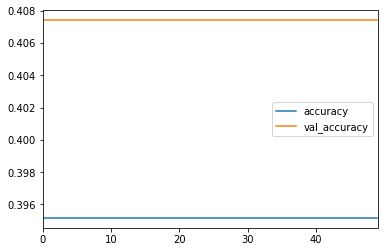

In [35]:
results[['accuracy', 'val_accuracy']].plot()

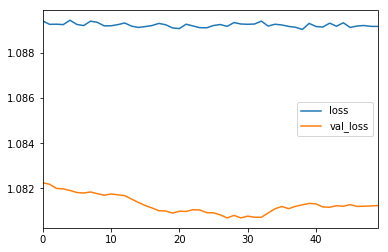

In [36]:
results[['loss', 'val_loss']].plot()

In [37]:
# モデルの再構築
model = models.Sequential()

# モデルに構築
model.add(layers.Dense(8, activation='relu', input_shape=(10,)))
model.add(layers.Dense(6, activation='relu', input_shape=(10,)))
model.add(layers.Dense(3, activation='softmax'))

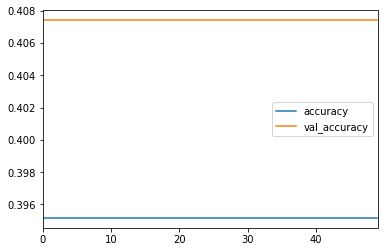

In [38]:
results[['accuracy', 'val_accuracy']].plot()

In [39]:
model.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [40]:
history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=0,
                   validation_data=(x_val, t_val))

In [41]:
type(history.history)

dict

In [42]:
results = pd.DataFrame(history.history)
results

,accuracy,loss,val_accuracy,val_loss
0,0.362903,63.097844,0.407407,1.097181
1,0.395161,1.097203,0.407407,1.096101
2,0.395161,1.096492,0.407407,1.094930
3,0.395161,1.095778,0.407407,1.093968
4,0.395161,1.095309,0.407407,1.093182
5,0.395161,1.094671,0.407407,1.092505
6,0.395161,1.094263,0.407407,1.091705
7,0.395161,1.093932,0.407407,1.091217
8,0.395161,1.093564,0.407407,1.090601
9,0.395161,1.093083,0.407407,1.090027


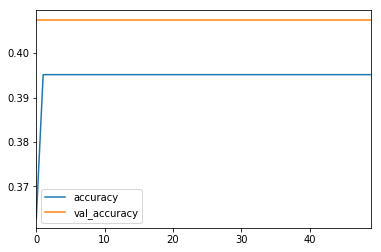

In [43]:
results[['accuracy', 'val_accuracy']].plot()

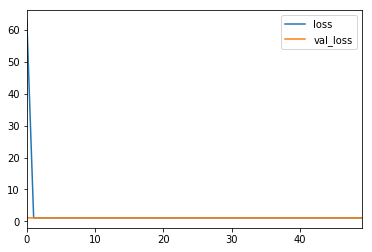

In [44]:
results[['loss', 'val_loss']].plot()

In [45]:
np.set_printoptions(precision=3, suppress=True)

In [46]:
x

array([[  14.23,    2.43,   15.6 , ...,    5.64,    1.04, 1065.  ],
       [  13.2 ,    2.14,   11.2 , ...,    4.38,    1.05, 1050.  ],
       [  13.16,    2.67,   18.6 , ...,    5.68,    1.03, 1185.  ],
       ...,
       [  13.27,    2.26,   20.  , ...,   10.2 ,    0.59,  835.  ],
       [  13.17,    2.37,   20.  , ...,    9.3 ,    0.6 ,  840.  ],
       [  14.13,    2.74,   24.5 , ...,    9.2 ,    0.61,  560.  ]])

In [47]:
# モデルの再構築
model = models.Sequential()

# モデルに構築 + BatchNormalization
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation='relu', input_shape=(10,)))
model.add(layers.Dense(3, activation='softmax'))

In [48]:
model.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [49]:
history = model.fit(x_train, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=0,
                   validation_data=(x_val, t_val))

In [50]:
results = pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
45,0.927419,0.212542,0.981481,0.101328
46,0.959677,0.186976,0.981481,0.099197
47,0.919355,0.290650,0.981481,0.099009
48,0.943548,0.184725,0.981481,0.095161
49,0.903226,0.212308,0.981481,0.094392


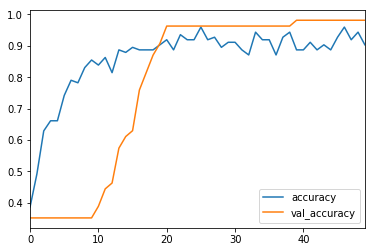

In [51]:
results[['accuracy', 'val_accuracy']].plot()

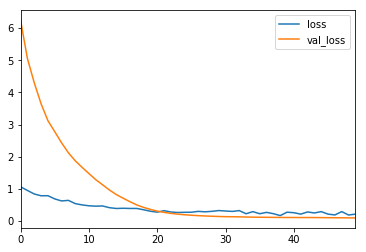

In [52]:
results[['loss', 'val_loss']].plot()

## 推論

In [53]:
# 新しいデータはないため、x_train の 1 個目のデータを新しいデータと仮定
x_new = x_train[0]

In [54]:
x_new.shape

(10,)

In [55]:
# model.predict(x_new) # エラー

In [56]:
# np.newaxis: 推論の際によく使う次元数を増やす手法
x_new = x_new[np.newaxis]

In [57]:
model.predict(x_new) # どのラベルであるかの確率を表示

array([[0.907, 0.067, 0.026]], dtype=float32)

In [58]:
# shape が変わる
x_new.shape

(1, 10)

In [59]:
y = model.predict(x_new)

In [60]:
np.argmax(y) # どのクラスかを推論。この場合、label 0

0

## 自己学習

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
x_train2 = x_train
x_train2 == x_train

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(x_train2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
x_train3 = scaler.transform(x_train2)
x_val3 = scaler.transform(x_val)

In [66]:
x_train3

array([[ 0.911, -0.011, -0.821, ..., -0.512,  0.657,  0.937],
       [-0.956, -1.537, -0.147, ..., -0.982, -0.409, -1.413],
       [ 0.36 , -0.375,  0.133, ...,  2.221, -1.56 ,  0.287],
       ...,
       [-0.706, -0.629,  0.834, ..., -1.255,  0.444, -1.306],
       [ 1.149, -0.883, -0.989, ...,  0.47 , -0.195,  0.774],
       [ 1.475,  0.425,  0.133, ...,  2.007, -1.432, -0.282]])

In [67]:
x_val3

array([[ 0.948, -0.411, -0.877,  1.227,  0.571,  0.956, -1.247,  0.363,
        -0.153,  1.018],
       [-0.242,  0.425,  0.694,  0.816, -1.302, -0.626, -1.004,  2.477,
        -2.028, -0.867],
       [-0.768, -0.738, -0.147, -0.896,  2.077,  1.162, -1.408, -0.235,
         1.126, -1.062],
       [ 0.723,  0.352,  0.273,  1.09 ,  1.174,  0.833, -1.328,  0.534,
         0.103,  1.213],
       [ 0.084, -0.847,  0.554, -0.965,  0.605,  0.699, -0.519, -1.025,
        -0.963, -1.192],
       [-1.783,  3.149,  2.517,  1.295,  1.542,  3.196,  0.854,  0.427,
        -0.11 , -0.916],
       [ 1.349,  0.897, -0.54 ,  1.432,  0.571,  0.555, -0.439,  0.021,
         0.444,  1.782],
       [-0.781,  0.061,  0.414, -0.828,  0.07 , -1.079,  1.097,  1.132,
        -1.687, -0.737],
       [-0.919, -0.883, -0.147, -1.376, -1.018,  0.062,  0.046, -0.683,
         0.188, -0.77 ],
       [-1.132, -0.157, -0.288, -1.307, -1.101, -0.482,  1.259, -1.11 ,
         0.529, -0.867],
       [ 0.472, -0.048,  0.133

In [68]:
# モデルの再構築
model = models.Sequential()

# モデルに構築 + BatchNormalization
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation='relu', input_shape=(10,)))
model.add(layers.Dense(3, activation='softmax'))

In [69]:
model.compile(optimizer='SGD',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [70]:
history = model.fit(x_train3, t_train,
                   batch_size=10,
                   epochs=50,
                   verbose=0,
                   validation_data=(x_val3, t_val))

In [71]:
results = pd.DataFrame(history.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
45,0.903226,0.334362,0.962963,0.288187
46,0.927419,0.323293,0.962963,0.282043
47,0.919355,0.365957,0.962963,0.277567
48,0.927419,0.325749,0.962963,0.271705
49,0.927419,0.305225,0.962963,0.267766


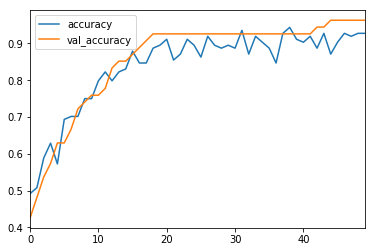

In [72]:
results[['accuracy', 'val_accuracy']].plot()

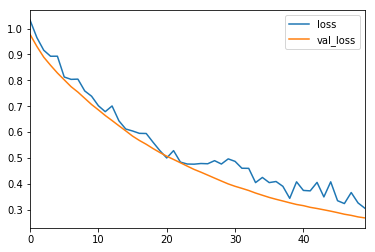

In [73]:
results[['loss', 'val_loss']].plot()